In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [245]:
df=pd.read_csv(r'C:\\Users\\user\\archive\\webmd.csv')

In [246]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [247]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


By looking at the head of the data we see that there are 12 features. 'Sides' can serve as our target variable. But it need some further processing as useful as a target variable.

In [6]:
#check the shape of the given dataset
df.shape

(362806, 12)

In [7]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [8]:
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Here have null values in Reviews column only.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              362806 non-null object
Condition        362806 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          362769 non-null object
Satisfaction     362806 non-null int64
Sex              362806 non-null object
Sides            362806 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 23.5+ MB


In [10]:
df.describe(include='all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,362806,362806,362806,362806,362806.000000,362806.000000,362806.000000,362769,362806.000000,362806,362806,362806.000000
unique,12,1806,4524,7093,NaN,NaN,NaN,250167,NaN,3,1651,NaN
top,45-54,Other,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,,NaN
freq,80043,49765,404,4648,NaN,NaN,NaN,41824,NaN,238226,17460,NaN
mean,NaN,NaN,NaN,NaN,36879.370774,4.019829,3.532061,NaN,3.135408,NaN,NaN,6.744916
std,NaN,NaN,NaN,NaN,52624.412971,1.317711,1.455961,NaN,1.611106,NaN,NaN,9.324240
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,3.000000,3.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,9548.000000,5.000000,4.000000,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,63522.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


# Insight

1.Most used drug is cymbalta, It will be intresting to see for what condition it is used.

2.People of age between 45 to 54 used more drugs.

3.Females are used more drugs.

4.Most single day review came on 10/29/2007.

In [11]:
df.apply(lambda x: len(x.unique()))

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250168
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [12]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

Here are 238226 females and 98043 males. But 26537 people have not been identified as belonging to any gender.

In [13]:
df['Sex'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

Female    65.662%
Male      27.024%
           7.314%
Name: Sex, dtype: object

In [14]:
df['Sex'].replace(' ',np.nan, inplace = True)

In [15]:
df.dropna(subset=['Sex'],inplace=True)

In [16]:
df['Sex'].value_counts()

Female    238226
Male       98043
Name: Sex, dtype: int64

In [17]:
#display all catagorical columns
df_catagorical=df.select_dtypes(include=['category'])


In [18]:
df.select_dtypes(include=['object']).columns.tolist()

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [19]:
df['Drug'].value_counts()

cymbalta                                                         4451
lisinopril solution                                              4022
lisinopril                                                       4022
lexapro                                                          3912
hydrocodone-acetaminophen                                        3661
effexor xr                                                       3315
lyrica                                                           2919
tramadol hcl                                                     2759
tramadol hcl er                                                  2759
zoloft                                                           2533
prednisone                                                       2445
prednisone tablet, delayed release (enteric coated)              2445
prednisone concentrate                                           2445
seroquel                                                         2307
phentermine hcl     

Most occuring drug is cymbalta

In [20]:
df['Effectiveness'].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
6         2
Name: Effectiveness, dtype: int64

In [21]:
#Checking effectiveness Distribution
eff_=df['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().\
rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
eff_['percent'] = 100 * (eff_['counts']/df.shape[0])
print(eff_)

   Effectiveness  counts    percent
0              5  120887  35.949493
1              4   76460  22.737749
2              3   56114  16.687236
3              1   54330  16.156708
4              2   28476   8.468220
5              6       2   0.000595


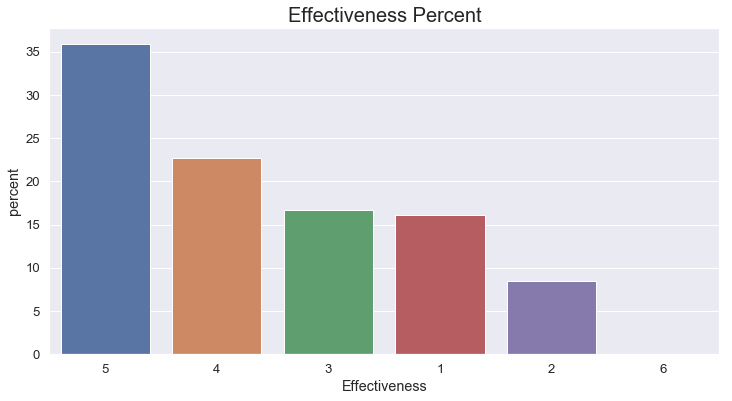

In [22]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
#let's plot and check
sns.barplot(x =eff_['Effectiveness'], y =eff_['percent'],order =eff_['Effectiveness'])
plt.title('Effectiveness Percent',fontsize=20)
plt.show()

Out of 10 the effectiveness of most of the drugs are 5 only. And others are below 5

# DATA VISUALISATION AND EXPLORATORY DATA ANALYSIS

In [23]:
#check number of unique values in drug and condition
print(df['Drug'].nunique())
print(df['Condition'].nunique())

6846
1754


We can see that there are 7093 drugs and only 1806 conditions. So there are conditions which has multiple drugs.

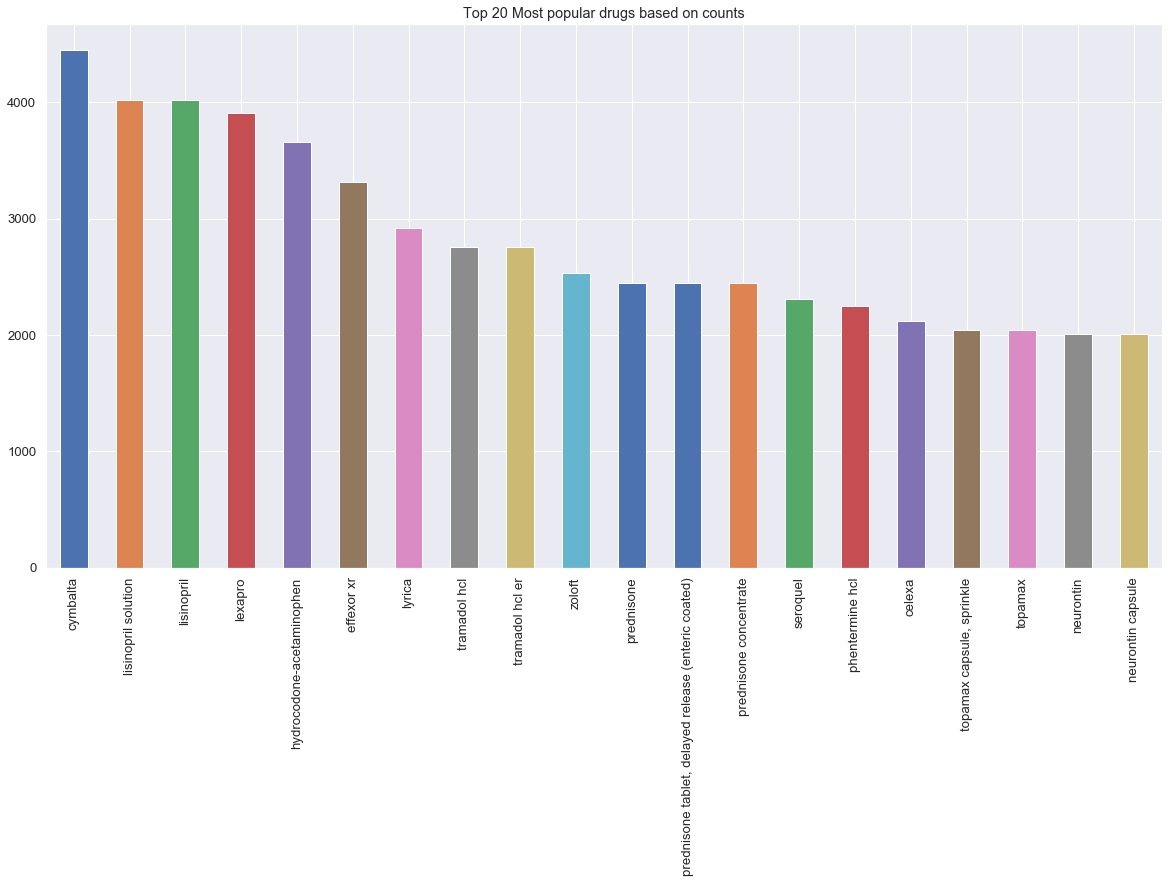

In [24]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(20,10))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

# Insight

1.The top used drug is cymbalta. 

2.The top 4 drugs has count around 4000 and above.

3.If we look at the top 20 most of the drugs counts are around 2000.

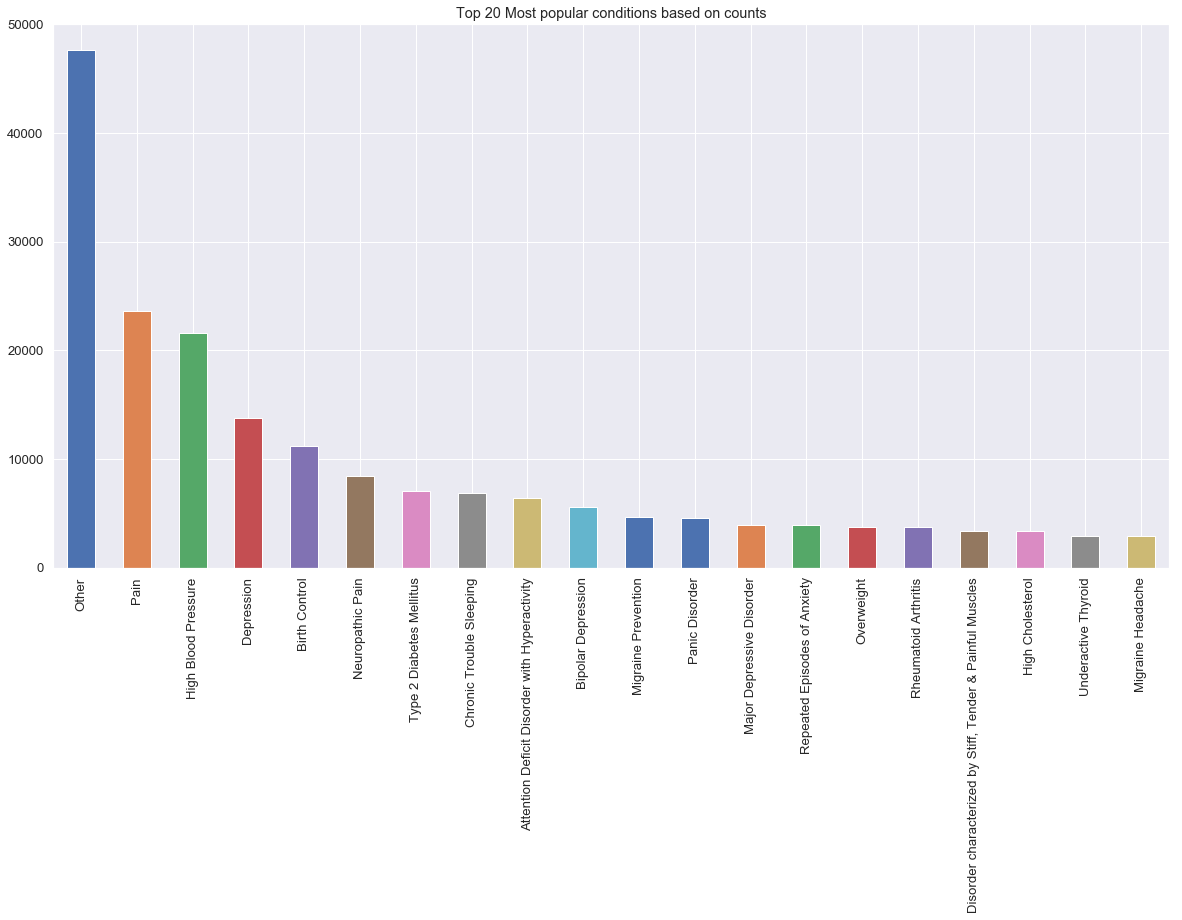

In [25]:
#plot a bargraph to check top 20 conditions
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

# Insight

The top most condition is other than listed conditions.

The unlisted condition i.e, 'Other' comes around 50000 and above.

other than top one condition pain and high blood pressure conditions uses more medicine.

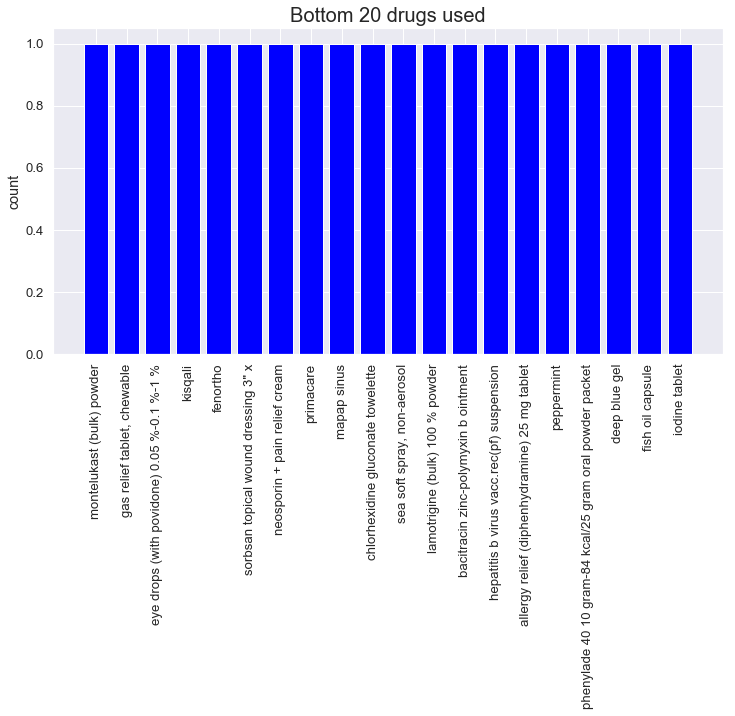

In [26]:
#plot a bargraph to check bottom 20 drugs used
plt.figure(figsize=(12,6))
drug_bottom=df['Drug'].value_counts(ascending = False).tail(20)

plt.bar(drug_bottom.index,drug_bottom.values,color='blue')
plt.title('Bottom 20 drugs used',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

From the above graph the each bottom 20 used drugs has count 1. These might be the drugs used of rare conditions or are new in market.

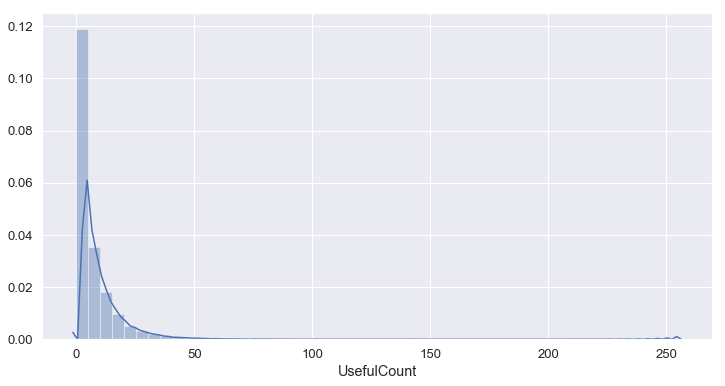

In [27]:
#plot a distribution plot of useful Count
sns.distplot(df['UsefulCount'])
plt.show()

# Insight

1.usefulCount is positively-skewed.

2.Most of the usefulCounts are distributed between 0 and 50.

3.There are extreme outliers present in our usefulCounts.

In [28]:
#Check number of Drugs per condition
df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4324
Osteoporosis                                   228
Birth Control                                  201
High Blood Pressure                            199
Pain                                           198
Acne                                           185
Painful Periods                                156
Rheumatoid Arthritis                           144
Cough                                          131
Cold Symptoms                                  120
Inflammation of the Nose due to an Allergy     117
Type 2 Diabetes Mellitus                       113
Abnormally Long or Heavy Periods               110
Stuffy Nose                                    105
Incomplete or Infrequent Bowel Movements       105
Disease of Ovaries with Cysts                  102
Allergic Conjunctivitis                         95
Migraine Headache                               94
"Change of Life" Signs                          91
Atopic Dermatitis    

In [29]:
len(df['Sides'].unique().tolist())

1620

In [30]:
df['Sides'].value_counts()

                                                                                                                                                                                                                                16192
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                                   14400
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                11123
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                                          8634
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision

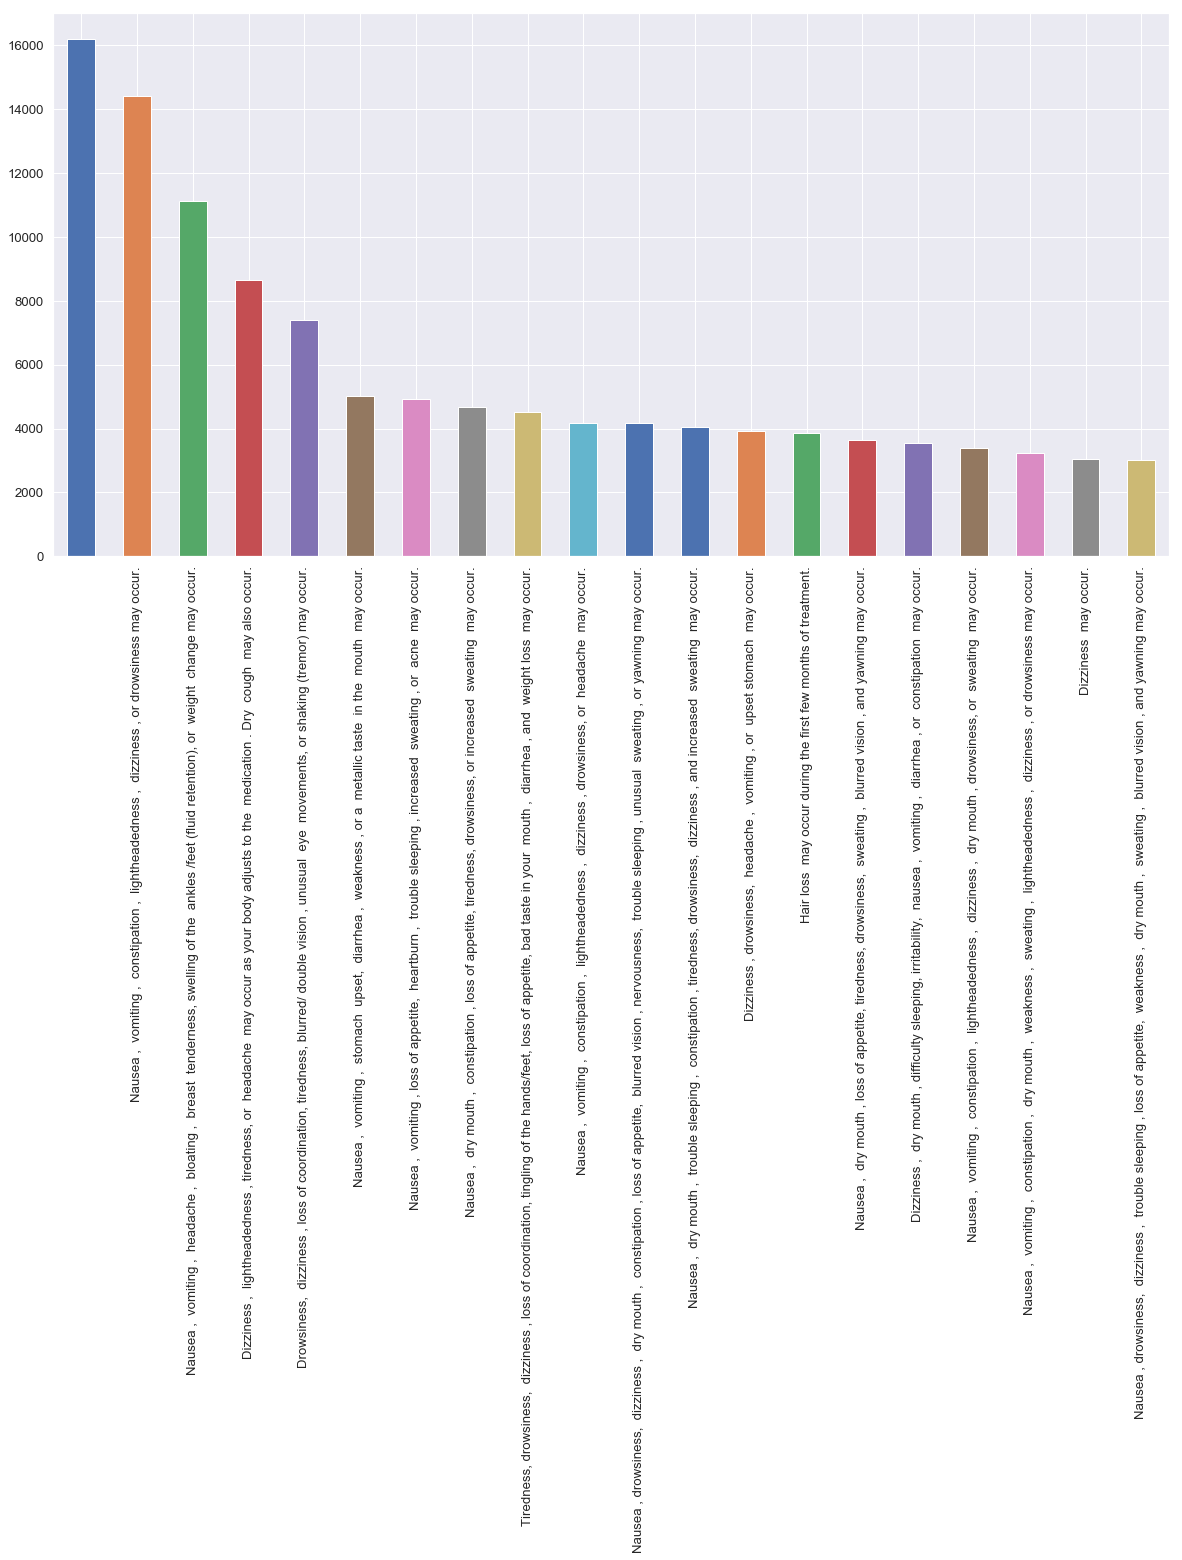

In [31]:
df['Sides'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

In [32]:
df['Satisfaction'].value_counts()

5    103610
1     92694
4     59032
3     48161
2     32770
6         2
Name: Satisfaction, dtype: int64

# EDA

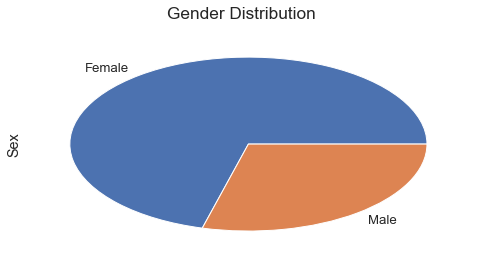

In [33]:
#pieplot
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")


# Usage of drugs with respect to age

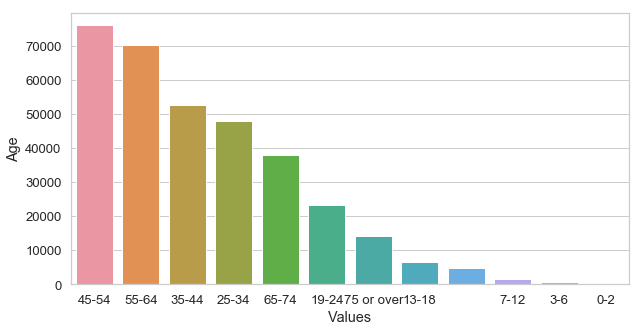

In [34]:
ageColourful = df['Age'].value_counts().reset_index()
ageColourful.columns = ["Values", "Age"]
ageColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y ='Age', data = ageColourful);
plt.show();

# Insight
Here we understand the usage of drugs with respect to Age. There were more than 50% of the drugs users from Age Group 45 to 65.But 45-54 is the mostly effected age group.

In [35]:
data=df.loc[(df['Age']=="45-54")]

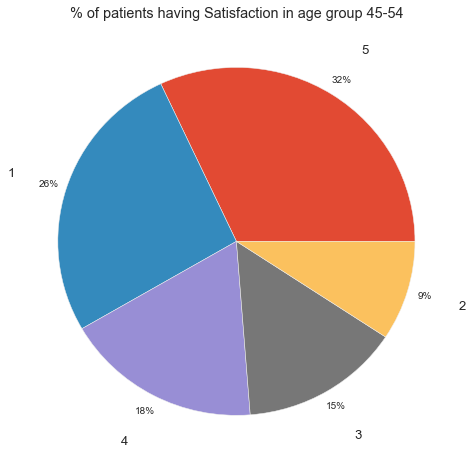

In [36]:
#pie chart of mostly effected age group that is 45-54
tr = pd.DataFrame(data['Satisfaction'].value_counts())
tr_names = tr.index
count=tr['Satisfaction']
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.3)
plt.title('% of patients having Satisfaction in age group 45-54')
plt.show()

# Effectiveness Rating

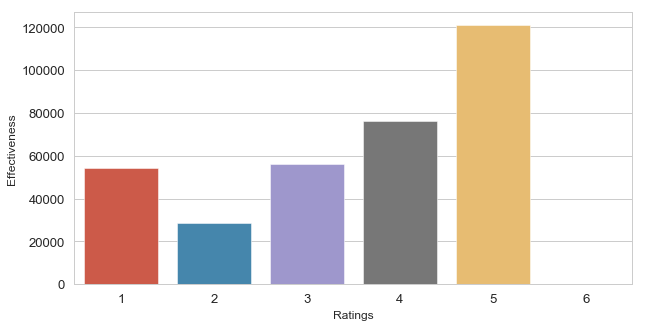

In [37]:
effectiveness = df['Effectiveness'].value_counts().reset_index()
effectiveness.columns = ["Ratings",'Effectiveness']
effectiveness

# set style
sns.set_style("whitegrid");

plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = 'Effectiveness', data = effectiveness);
plt.show();

# Insight
Here we understand the usage of drugs with how effective they are. Most of the drugs shows either scored too high or too low on the their effectiveness of their use.

# Satisfaction level

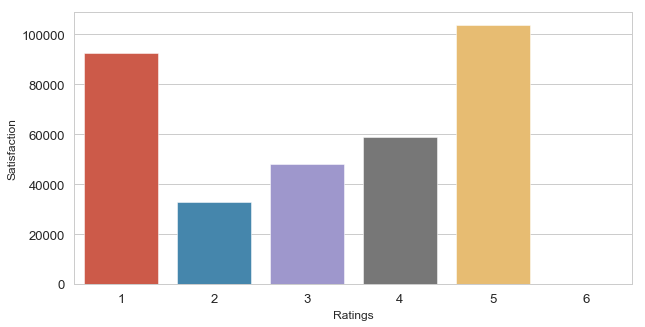

In [38]:
satisfactionLevel = df['Satisfaction'].value_counts().reset_index()
satisfactionLevel.columns = ["Ratings", "Satisfaction"]
satisfactionLevel

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y ='Satisfaction', data = satisfactionLevel);
plt.show();

# Insight
 Here we understand the usage of drugs with respect to their Satisfaction, Most of the drugs shows ease of using either scored very high or very low on their Satisfaction level.

# Ease of Use Rating

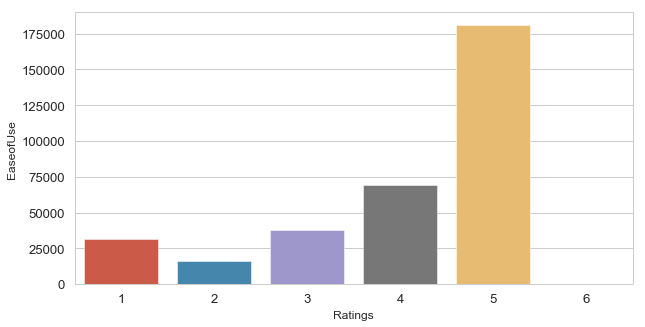

In [39]:
easeOfUseRating = df['EaseofUse'].value_counts().reset_index()
easeOfUseRating.columns = ["Ratings", "EaseofUse"]
easeOfUseRating

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = "EaseofUse", data = easeOfUseRating);
plt.show();

# Insight
Here we understand the usage of drugs with respect to their Ease of Usage, Most of the drugs shows scored high.

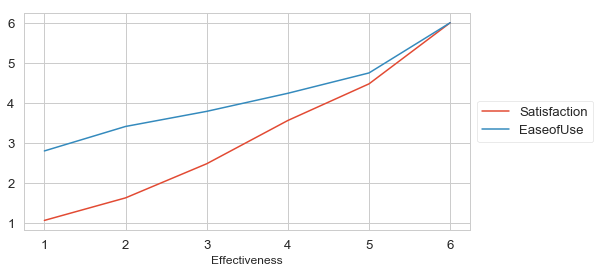

In [40]:
# line chart

df.groupby('Effectiveness')['Satisfaction','EaseofUse'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

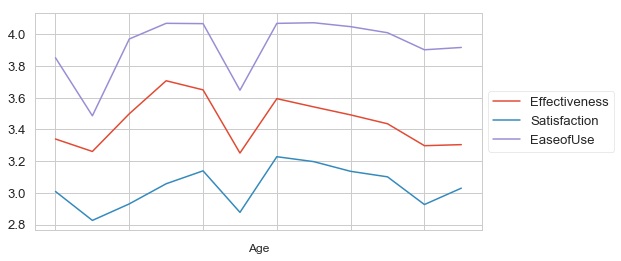

In [41]:
# line chart

df.groupby('Age')['Effectiveness','Satisfaction', 'EaseofUse'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

In [42]:
dfcorr = df.corr()
dfcorr

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.012843,-0.010473,-0.033542,0.013562
EaseofUse,-0.012843,1.000000,0.532291,0.553150,0.028139
Effectiveness,-0.010473,0.532291,1.000000,0.793238,0.048909
Satisfaction,-0.033542,0.553150,0.793238,1.000000,0.018570
UsefulCount,0.013562,0.028139,0.048909,0.018570,1.000000


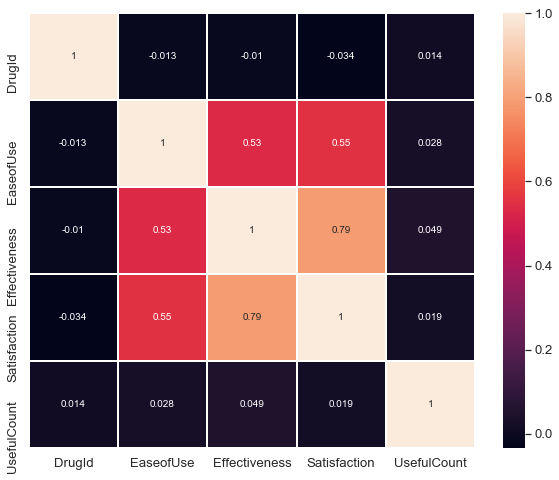

In [43]:
#find correlation
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(dfcorr, xticklabels = dfcorr.columns, yticklabels = dfcorr.columns,annot=True,linewidths=1)


In [44]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

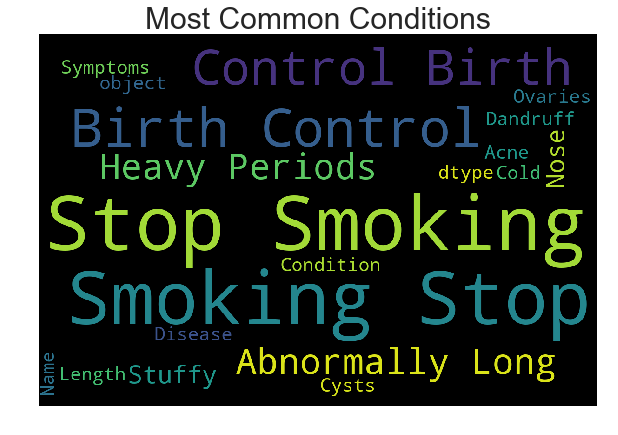

In [45]:
# most common conditions among the patients

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df['Condition']))

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Most Common Conditions', fontsize = 30)
print(wordcloud)
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

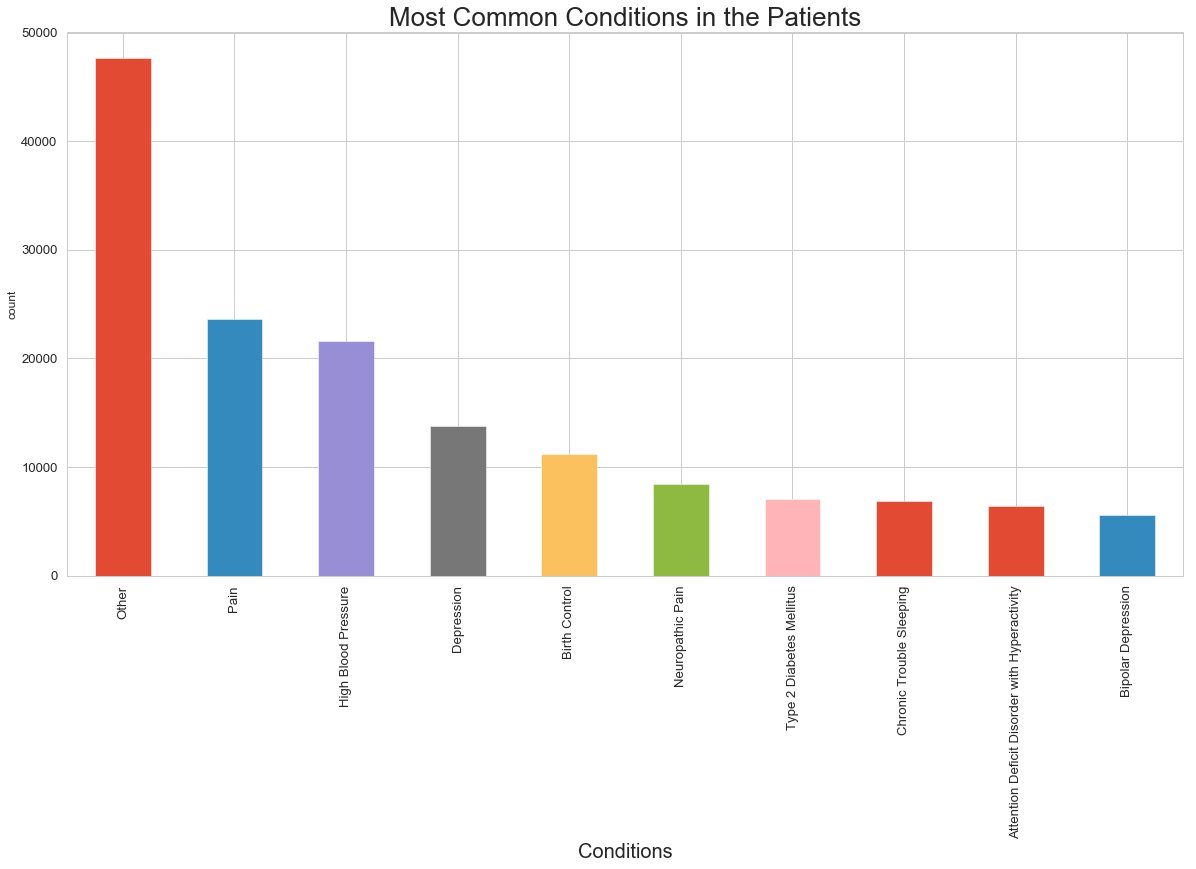

In [46]:
# checking Most Common Conditions in the Patients

df['Condition'].value_counts().head(10).plot.bar(figsize = (20, 10))
plt.title('Most Common Conditions in the Patients', fontsize = 26)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

# Insight
Pain,High blood pressure,Depression are the most common conditions in the patients.

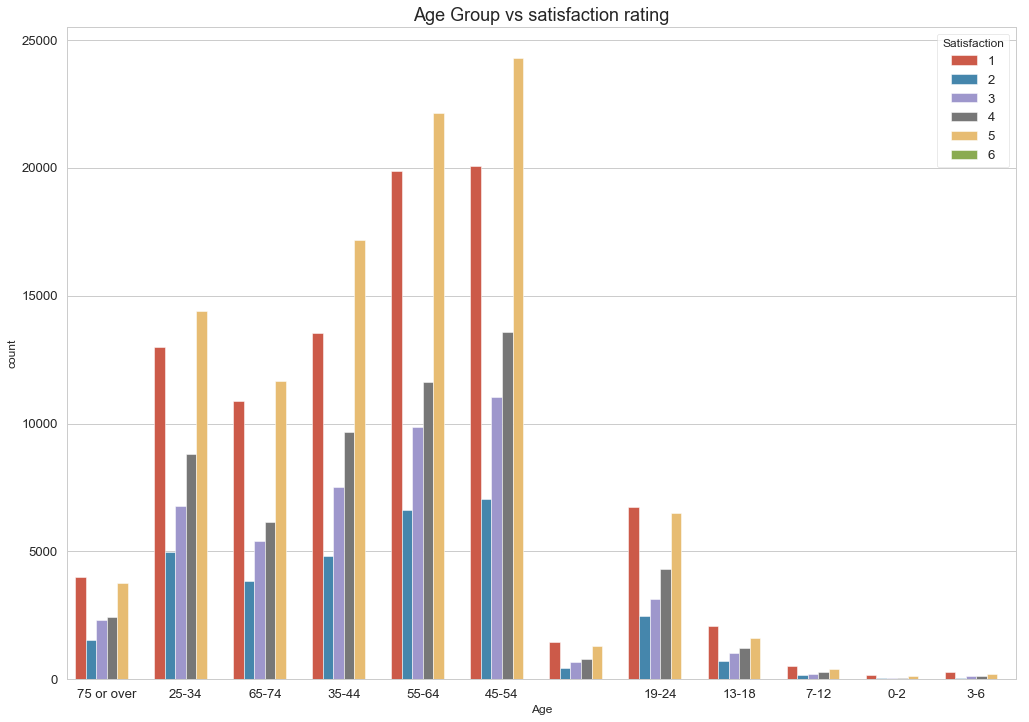

In [47]:
age_effect=df.groupby('Age')['Satisfaction'].sum()
plt.figure(figsize=(17,12))
plt.title('Age Group vs satisfaction rating',fontsize=18)

sns.countplot(data=df,x="Age",hue="Satisfaction")
plt.show()

In [52]:
#extract month,day and year from the dataset 
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')

In [54]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment
0,75 or over,Stuffy Nose,09/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0
1,25-34,Cold Symptoms,01/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0
2,65-74,Other,07/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.0
3,75 or over,Other,09/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.0
4,35-44,Other,01/06/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.0
5,55-64,Other,07/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0,0.0
6,25-34,Birth Control,06/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,0.0
7,45-54,Disease of Ovaries with Cysts,01/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,1.0
8,25-34,Acne,04/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1,0.0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,0.0


In [55]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['time'] = df['Date'].dt.time

In [56]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day,time
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0,2014,9,21,00:00:00
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0,2011,1,13,00:00:00
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.0,2012,7,16,00:00:00
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.0,2010,9,23,00:00:00
4,35-44,Other,2009-01-06,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.0,2009,1,6,00:00:00
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0,0.0,2008,7,19,00:00:00
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,0.0,2017,6,15,00:00:00
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,1.0,2017,1,30,00:00:00
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1,0.0,2016,4,27,00:00:00
9,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,0.0,2012,10,29,00:00:00


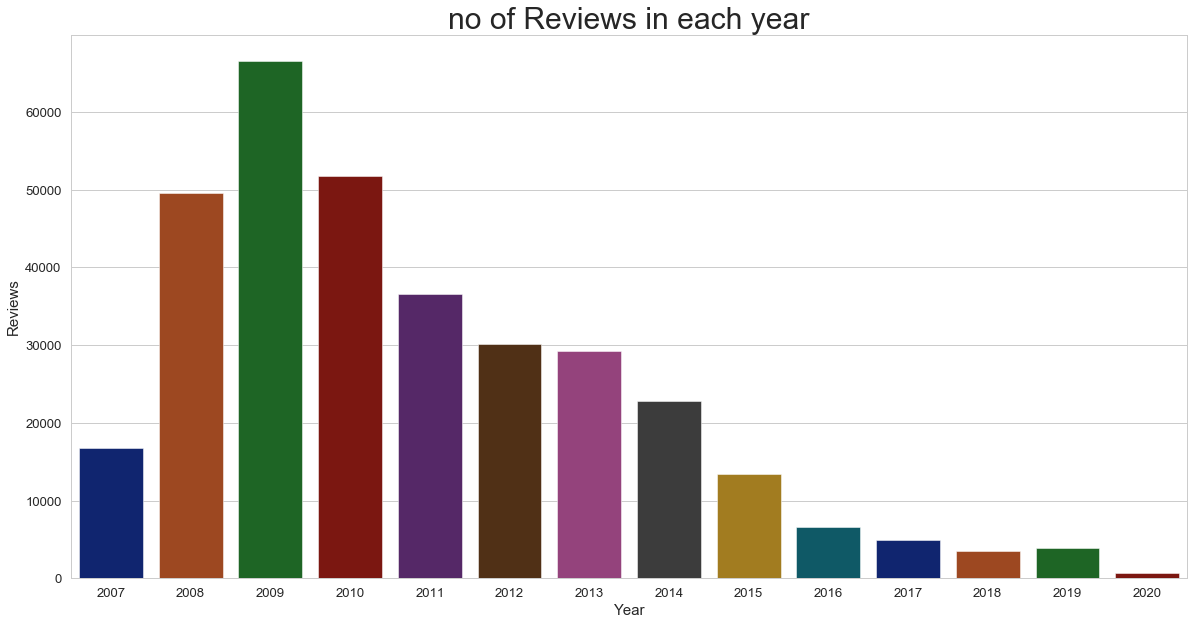

In [57]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['Year'], palette ='dark')
plt.title('no of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)
plt.show()

# pre processing

In [248]:
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [249]:
df["Reviews"].fillna( method ='ffill', inplace = True)

In [250]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Selection of Drug
We are selecting the dataset extracted based on the drug named 'cymbalta' with DrugId =91491.Because it is having the most occurences.

In [251]:
data=df.drop(df.loc[(df['Drug']!='cymbalta')].index)

In [252]:
data.shape

(4648, 12)

In [253]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314212,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1


In [254]:
data['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [255]:
data['UsefulCount'].unique()

array([ 12,   0,   1,   2,  11,  22,   3,  15,  27,  30,   4,   5,  19,
        28,  21,  36,  35,  34,  25,   8,   7,  18,  39,   9,  56,  29,
        71,  23,   6,  32,  24,  17,  13,  14,  10,  16,  20,  42, 103,
        38,  33,  26,  61,  41,  93,  90, 134, 145,  51,  43,  48,  31,
        82,  58,  46,  47,  45,  44,  60,  50, 116,  40,  65,  97,  77,
       129,  68,  59,  37], dtype=int64)

In [256]:
data['Condition'].value_counts()

Major Depressive Disorder                                    1939
Neuropathic Pain                                              699
Repeated Episodes of Anxiety                                  577
Other                                                         514
Disorder characterized by Stiff, Tender & Painful Muscles     409
Chronic Muscle or Bone Pain                                   405
Anxiousness associated with Depression                         55
Diabetic Complication causing Injury to some Body Nerves       50
Name: Condition, dtype: int64

In [257]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [258]:
df.Reviews.nunique()

250167

In [259]:
#Since Reviews is having more than half of the values as unique we can neglect this column
data.drop("Reviews",axis=1,inplace=True)

In [260]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
314212,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,2,,"Nausea , dry mouth , constipation , loss of ...",1


In [261]:
df.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [262]:
df_copy =data

# finding missing values

In [263]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
7-12             1
0-2              1
Name: Age, dtype: int64

there is a age group is missing(group 3-6) and shown a blank space.

In [264]:
#filling the blank space with 3-6
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [265]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
7-12             1
0-2              1
Name: Age, dtype: int64

# OUTLIERS DETECTION

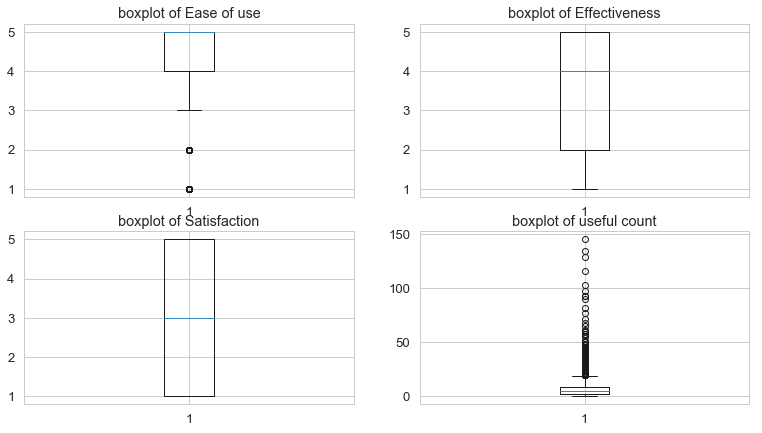

In [266]:
plt.figure(figsize=(13,7))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()

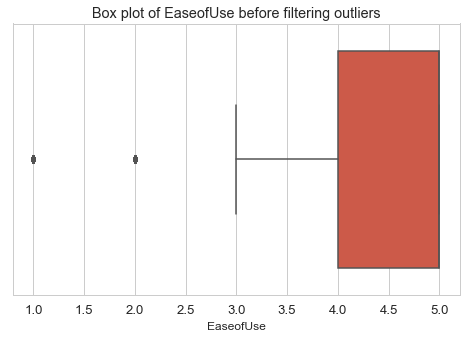

In [267]:
#Removing the outliers in EaseofUse column
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(data['EaseofUse'],data=data)
plt.title('Box plot of EaseofUse before filtering outliers');

In [268]:
Q1 = data['EaseofUse'].quantile(0.25)
Q3 = data['EaseofUse'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['EaseofUse']=np.where(data['EaseofUse']>upper_whisker,upper_whisker,np.where(data['EaseofUse']<lower_whisker,lower_whisker,data['EaseofUse']))

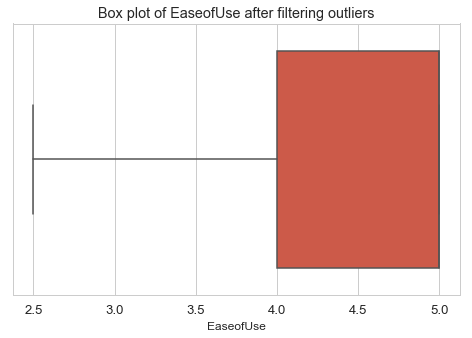

In [269]:
plt.figure(figsize=(8,5))
sns.boxplot(data['EaseofUse'],data=data)
plt.title('Box plot of EaseofUse after filtering outliers');

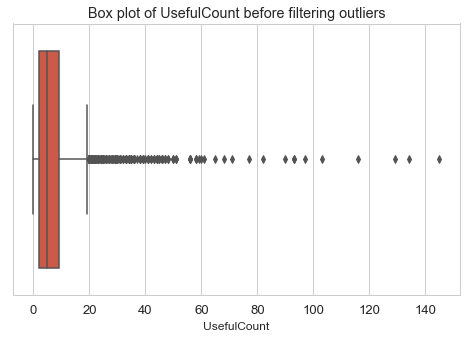

In [270]:
#Removing the outliers in UsefulCount column
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(data['UsefulCount'],data=data)
plt.title('Box plot of UsefulCount before filtering outliers');

In [271]:
Q1 = data['UsefulCount'].quantile(0.25)
Q3 = data['UsefulCount'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['UsefulCount']=np.where(data['UsefulCount']>upper_whisker,upper_whisker,np.where(data['UsefulCount']<lower_whisker,lower_whisker,data['UsefulCount']))

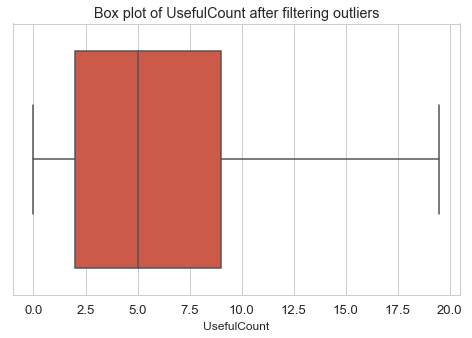

In [272]:
plt.figure(figsize=(8,5))
sns.boxplot(data['UsefulCount'],data=data)
plt.title('Box plot of UsefulCount after filtering outliers');

In [273]:
data.shape

(4648, 11)

In [274]:
#adding index column
list2=list(range(4648))
data=data.set_index([list2])

In [275]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,3-6,Major Depressive Disorder,2/29/2020,cymbalta,91491,5.0,5,5,,"Nausea , dry mouth , constipation , loss of ...",12.0
1,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
2,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5.0,5,5,,"Nausea , dry mouth , constipation , loss of ...",0.0
3,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
4,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2.5,2,2,,"Nausea , dry mouth , constipation , loss of ...",1.0


# Encoding

In [276]:
# On the basis of 'Satisfaction' let us recode the values of 'Effectiveness' to  categorical values rnging from 1 to 5.
data['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [277]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,3-6,Major Depressive Disorder,2/29/2020,cymbalta,91491,5.0,no side effects,5,,"Nausea , dry mouth , constipation , loss of ...",12.0
1,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
2,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5.0,no side effects,5,,"Nausea , dry mouth , constipation , loss of ...",0.0
3,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,moderate side effects,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
4,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2.5,severe side effects,2,,"Nausea , dry mouth , constipation , loss of ...",1.0


# Effect of drug on age group 45-54 (which is mostly affected among the age group)

# Feature engineering

In [278]:
dt=data.loc[(data['Age']=="45-54")]

In [279]:
# let's make a new column review sentiment 
data.loc[(data['Satisfaction'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['Satisfaction'] <5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

0.0    3380
1.0    1268
Name: Review_Sentiment, dtype: int64

In [280]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment
0,3-6,Major Depressive Disorder,2/29/2020,cymbalta,91491,5.0,no side effects,5,,"Nausea , dry mouth , constipation , loss of ...",12.0,1.0
1,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0
2,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5.0,no side effects,5,,"Nausea , dry mouth , constipation , loss of ...",0.0,1.0
3,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,moderate side effects,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0
4,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2.5,severe side effects,2,,"Nausea , dry mouth , constipation , loss of ...",1.0,0.0


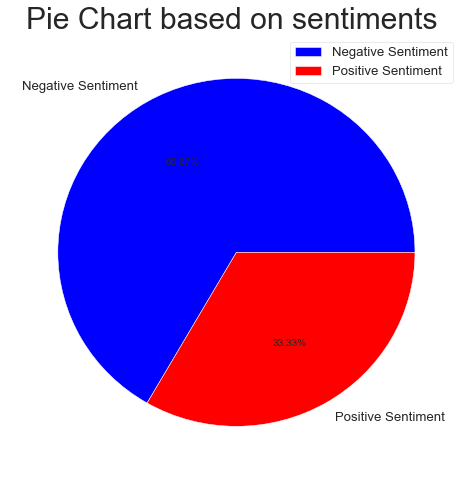

In [281]:
# a pie chart to represent the sentiments of the patients

colors = ['blue', 'red']
labels = "Negative Sentiment","Positive Sentiment"
size=[3000,1500]
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size, colors = colors, labels = labels,autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart based on sentiments ', fontsize = 30)
plt.legend()
plt.show()

In [282]:
data=data.drop(['Date','Drug','DrugId','Sides'],axis=1)

# Label encoding

In [283]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    data[col]=label.fit_transform(data[col])
    
datastand=data

In [284]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,4,4,5.0,no side effects,5,0,12.0,1.0
1,6,7,3.0,extreme severe side effects,1,2,0.0,0.0
2,6,0,5.0,no side effects,5,0,0.0,1.0
3,5,0,3.0,moderate side effects,2,1,0.0,0.0
4,7,1,2.5,severe side effects,2,0,1.0,0.0


# Data splitting

In [285]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
ycopy=df_copy['Effectiveness']
xcopy=df_copy.drop(['Effectiveness'],axis=1)

In [286]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
xcopy_train,xcopy_test,ycopy_train,ycopy_test=train_test_split(xcopy,ycopy,random_state=42,test_size=0.1)

# Model Selection

In [287]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.69      0.96      0.81       104
          mild side effects       0.48      0.72      0.58       101
      moderate side effects       0.51      0.25      0.34        79
            no side effects       0.85      0.78      0.81       142
        severe side effects       0.00      0.00      0.00        39

                avg / total       0.61      0.65      0.61       465

[[100   3   0   1   0]
 [  7  73   4  17   0]
 [ 14  43  20   2   0]
 [  5  25   1 111   0]
 [ 18   7  14   0   0]]
accuracy is 0.6537634408602151


# KNeighborsClassifier

In [289]:
from sklearn.neighbors import KNeighborsClassifier
# Finding best k value
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [290]:
acc_values

[0.5763440860215053,
 0.589247311827957,
 0.6021505376344086,
 0.6064516129032258,
 0.6193548387096774,
 0.6172043010752688,
 0.632258064516129,
 0.6387096774193548,
 0.6430107526881721,
 0.6473118279569893,
 0.6451612903225806,
 0.6365591397849463]

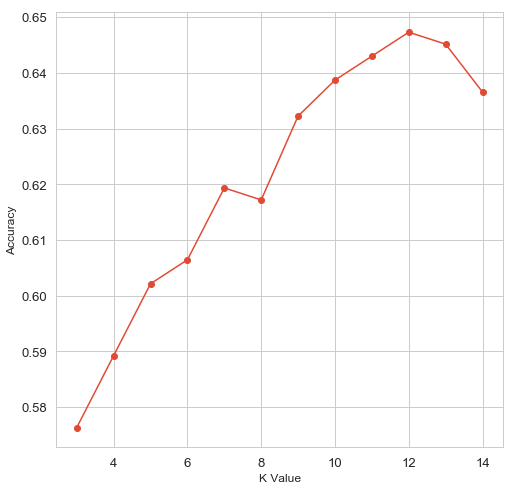

In [291]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [292]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.64      0.89      0.75       104
          mild side effects       0.55      0.62      0.58       101
      moderate side effects       0.53      0.38      0.44        79
            no side effects       0.83      0.80      0.81       142
        severe side effects       0.17      0.05      0.08        39

                avg / total       0.62      0.65      0.62       465

[[ 93   1   4   1   5]
 [  7  63  11  20   0]
 [ 19  24  30   1   5]
 [  6  21   2 113   0]
 [ 20   6  10   1   2]]
accuracy is 0.6473118279569893


# GradientBoostingClassifier

In [293]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.70      0.95      0.80       104
          mild side effects       0.66      0.58      0.62       101
      moderate side effects       0.56      0.63      0.60        79
            no side effects       0.83      0.78      0.81       142
        severe side effects       0.36      0.10      0.16        39

                avg / total       0.68      0.69      0.68       465

[[ 99   0   3   1   1]
 [  7  59  14  20   1]
 [ 13  10  50   1   5]
 [  5  18   8 111   0]
 [ 18   3  14   0   4]]
accuracy is 0.6946236559139785


# Bernoulli Naive Bayes

In [294]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                             precision    recall  f1-score   support

extreme severe side effects       0.69      0.96      0.81       104
          mild side effects       0.75      0.47      0.57       101
      moderate side effects       0.46      0.71      0.56        79
            no side effects       0.84      0.80      0.82       142
        severe side effects       0.00      0.00      0.00        39

                avg / total       0.65      0.68      0.65       465

[[100   0   3   1   0]
 [  7  47  28  19   0]
 [ 14   6  56   1   2]
 [  5  10  14 113   0]
 [ 18   0  21   0   0]]


# RandomForestClassifier

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.68      0.69      0.69       104
          mild side effects       0.51      0.56      0.54       101
      moderate side effects       0.40      0.44      0.42        79
            no side effects       0.79      0.73      0.76       142
        severe side effects       0.11      0.08      0.09        39

                avg / total       0.58      0.58      0.58       465

[[ 72   6  10   2  14]
 [  5  57  21  18   0]
 [ 10  19  35   6   9]
 [  2  27   7 104   2]
 [ 17   3  14   2   3]]
accuracy is 0.5827956989247312


In [296]:
# Fine tuning of parametres
rf_ft=RandomForestClassifier(max_depth=100,n_estimators=100)
rf_ft.fit(x_train,y_train)
y_rf_ft=rf_ft.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rf_ft))
print("confusion matrix is",confusion_matrix(y_test,y_rf_ft))

accuracy is 0.5806451612903226
confusion matrix is [[ 75   7   6   3  13]
 [  6  58  19  17   1]
 [  9  21  32   6  11]
 [  2  31   7 100   2]
 [ 16   2  15   1   5]]


 There is a slight difference after fine tuning.

# DecisionTreeClassifier

In [297]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is ',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.72      0.63      0.67       104
          mild side effects       0.45      0.60      0.51       101
      moderate side effects       0.38      0.38      0.38        79
            no side effects       0.71      0.61      0.66       142
        severe side effects       0.17      0.15      0.16        39

                avg / total       0.55      0.54      0.54       465

[[66 10 11  4 13]
 [ 6 61 12 21  1]
 [ 5 23 30  7 14]
 [ 2 40 11 87  2]
 [13  3 14  3  6]]
Accuracy is  0.5376344086021505


# SVC

In [298]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)

# Summary of the predictions made by the classifier

y_pred=svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.69      0.96      0.80       104
          mild side effects       0.65      0.59      0.62       101
      moderate side effects       0.50      0.58      0.54        79
            no side effects       0.85      0.78      0.81       142
        severe side effects       0.25      0.03      0.05        39

                avg / total       0.66      0.68      0.66       465

[[100   0   3   1   0]
 [  7  60  16  18   0]
 [ 15  14  46   1   3]
 [  5  17   9 111   0]
 [ 18   2  18   0   1]]
accuracy is 0.6838709677419355


# Ensemble Learning

In [299]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()
gb_clf=GradientBoostingClassifier()
gnb_clf=GaussianNB()
dt_clf=DecisionTreeClassifier()
svc_clf=SVC()
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')

In [300]:
voting_clf = voting.fit(x_train, y_train)

In [301]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, gb_clf,gnb_clf,dt_clf,svc_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6537634408602151
RandomForestClassifier 0.5806451612903226
KNeighborsClassifier 0.6021505376344086
GradientBoostingClassifier 0.6946236559139785
GaussianNB 0.6795698924731183
DecisionTreeClassifier 0.5419354838709678
SVC 0.6838709677419355
VotingClassifier 0.6881720430107527


In [302]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.602151
1   LR  0.653763
2   DT  0.541935
3   RF  0.576344
4   GB  0.694624
5  GNB  0.679570
6  SVC  0.683871
7   EL  0.688172


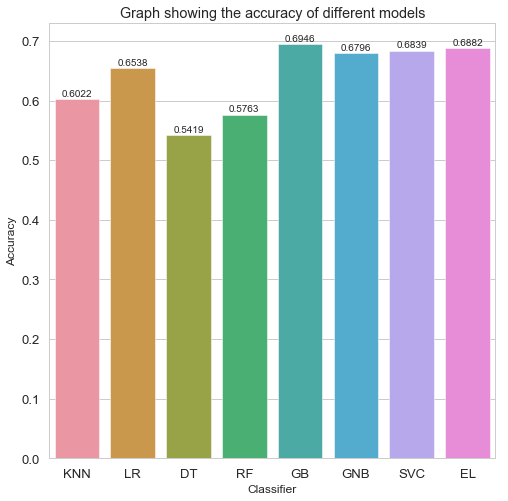

In [303]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Graph showing the accuracy of different models')    
plt.show()

# Inference: 
Comparing different models, GradientBoostingClassifier shows highest accuracy with 69.46 and seem to be the best of all models.